# CS 315 Project #1: Data Visualization (*Group 2*)

**Section 01 - Group 2 Data Visualization Code**

**Written**: Wednesday, February 14, 2024

<a id="sec1"></a>
# 1. Loading in our data

We will load into pandas our data for all data collection runs. Our raw data has been previously cleaned and concatenated together.

Our dataset has the following columns:
- **batchID**: *string* concatenation of "user, "run", "batch", "index"
- **run**: *int* representing 1-5 runs that webdriver preformed
- **batch**: *int* representing batch 1-5 for each individual run
- **index**: *int* representing index value of video per batch
- **saved**: *boolean* True if video was saved, False otherwise
- **author**: *string* representation of video's creator
- **likes**: *int* number of likes
- **comments**: *int* number of comments
- **shares**: *int* number of shares
- **saves**: *int* number of saves
- **music**: *string* representation of sound used in video
- **hashtags**: *list* of hashtags used in video


***NOTE: Change/Update file paths!***

In [1]:
# import all libraries we will need in order to run this notebook
import os, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import urllib

##### Using os we are finding the file path for our data and loading it into a new pandas dataframe.

In [5]:
# Loading in our data
cwd = os.getcwd()
df = pd.read_csv(f'{cwd}/../data/master.csv')
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl..."
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',..."
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes']
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag..."


<a id="sec2"></a>
# 2. Analyzing our data

## **plot_metric_member**

Creates data frames for one person's control and active account and plots the median for each run.

Each plot is saved in folder named "*visualizations*".

##### **Parameters**:
- **Metric**: *str*, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
- **Initial**: *str*, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)

In [14]:
df["group"] = ["active" if "activ" in row else 'control' for row in df['batchID']]
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags,group
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN,active
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...",active
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN,active
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',...",active
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN,control
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN,control
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes'],control
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag...",control


In [7]:
# For each team member, create a separate dataframe containing their active data
ep_activ = df[df['batchID'].str.contains('ep_activ')]
ss_activ = df[df['batchID'].str.contains('ss_activ')]
fg_activ = df[df['batchID'].str.contains('fg_activ')]
fn_activ = df[df['batchID'].str.contains('fn_activ')]
lg_activ = df[df['batchID'].str.contains('lg_activ')]
dl_activ = df[df['batchID'].str.contains('Dl_activ')]

In [8]:
# For each team member, create a separate dataframe containing their control data
ep_cntrl = df[df['batchID'].str.contains('ep_cntrl')]
ss_cntrl = df[df['batchID'].str.contains('ss_cntrl')]
fg_cntrl = df[df['batchID'].str.contains('fg_cntrl')]
fn_cntrl = df[df['batchID'].str.contains('fn_cntrl')]
lg_cntrl = df[df['batchID'].str.contains('lg_cntrl')]
dl_cntrl = df[df['batchID'].str.contains('Dl_cntrl')]

##### We will concatenate each users two datasets to form one dataframe per memeber.

In [9]:
ep = pd.concat([ep_cntrl,ep_activ])
ss = pd.concat([ss_cntrl,ss_activ])
fg = pd.concat([fg_cntrl,fg_activ])
fn = pd.concat([fn_cntrl,fn_activ])
lg = pd.concat([lg_cntrl,lg_activ])
dl = pd.concat([dl_cntrl,dl_activ])

In [12]:
def plot_metric_member(metric, initial, df):
    '''
    Creates data frames for one person's control and active account and plots the mean for each run.

    Parameters:
        Metric: str, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
        Initial: str, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)
    '''
    sns.set_theme(style="whitegrid")
    fig = sns.lineplot(x="run", 
                       y= metric,
                       data=df, 
                       hue="group",
                       marker='o',
                       errorbar=None)

    plt.title(f'Median {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')
    plt.legend(loc='upper left',title="Legend")

    plt.savefig(f'{cwd}/vizualizations/{initial}_{metric}.png', bbox_inches='tight')
    plt.show()

##### Now we will run **plot_metric_member** once for each member (ep, dl, lg, fg, fn, ss).

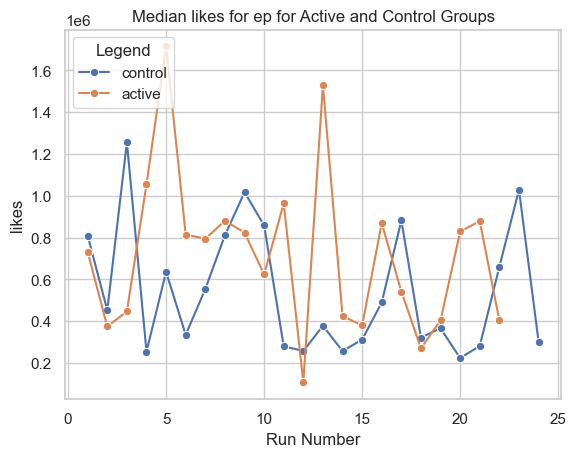

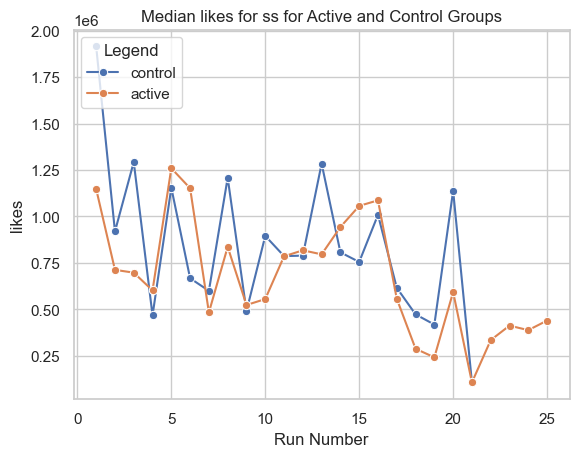

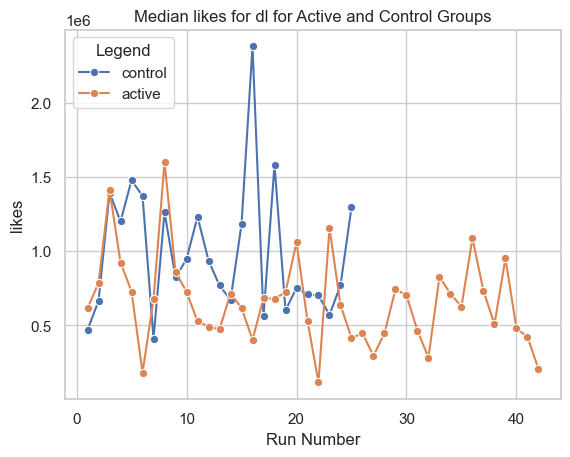

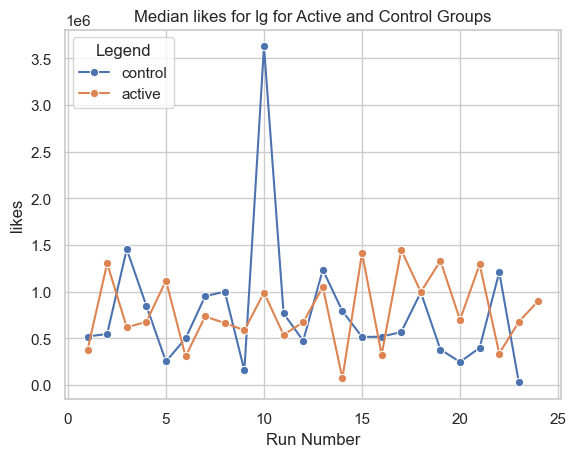

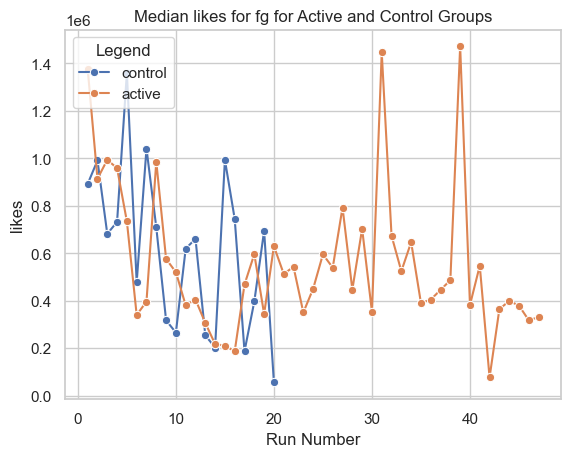

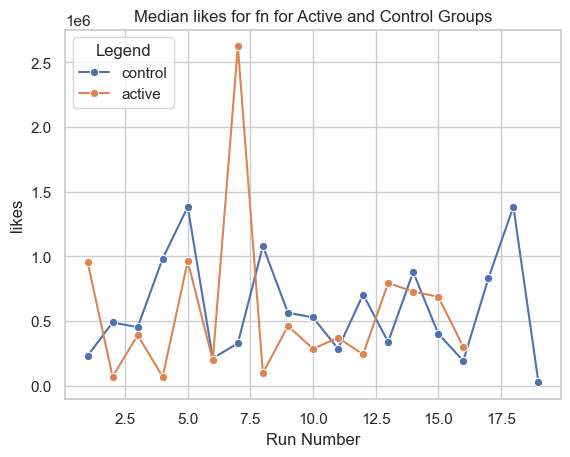

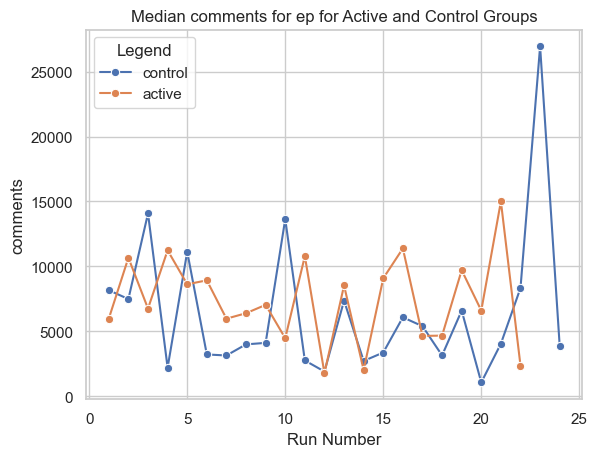

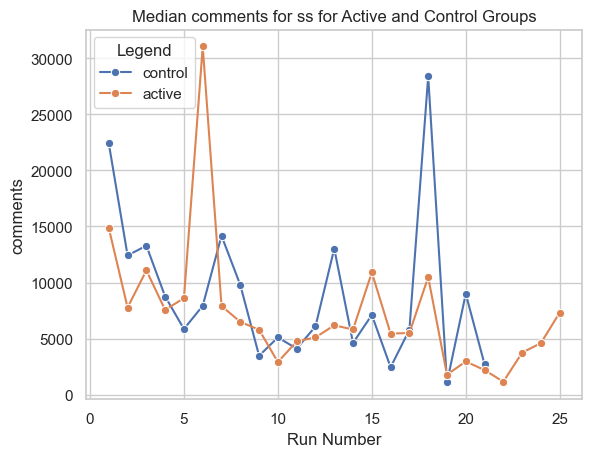

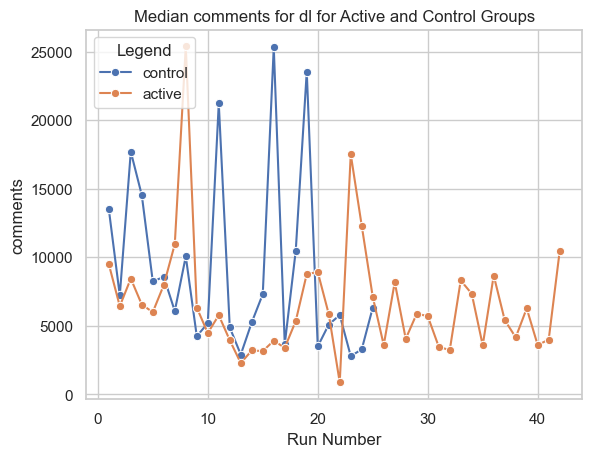

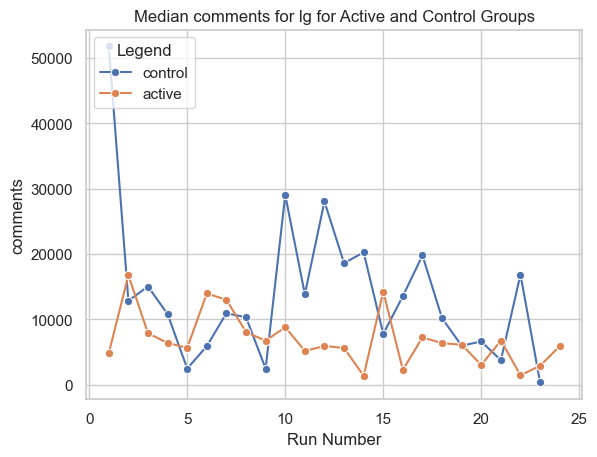

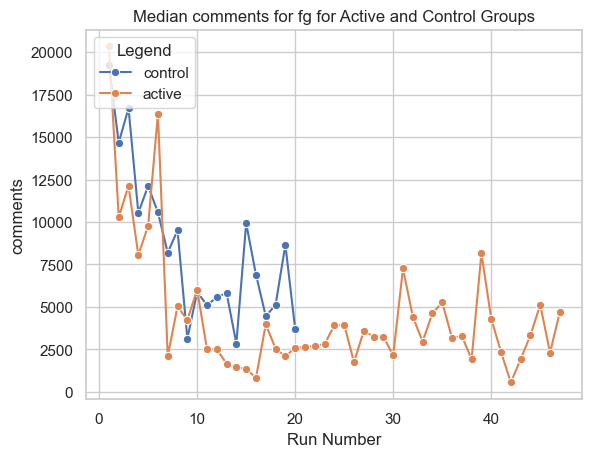

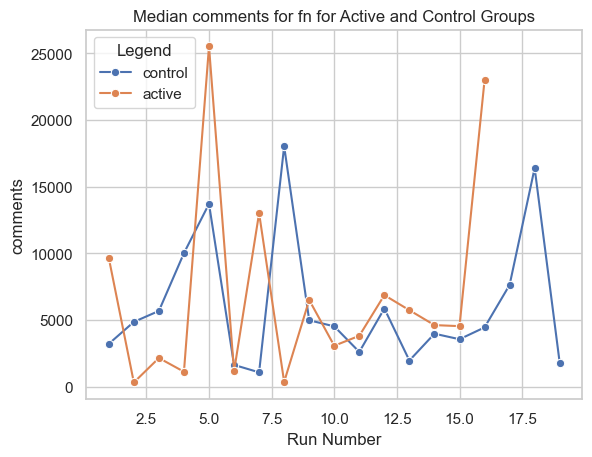

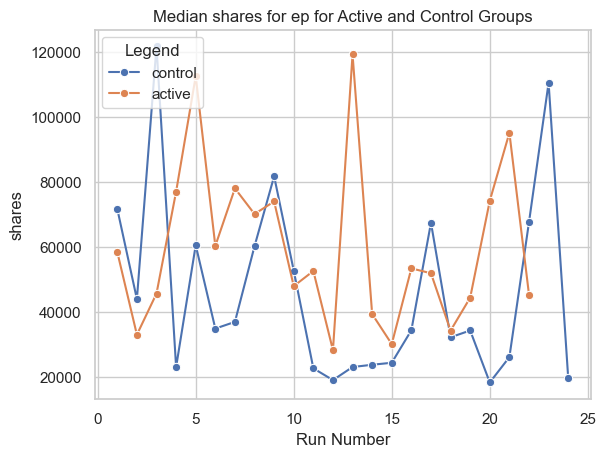

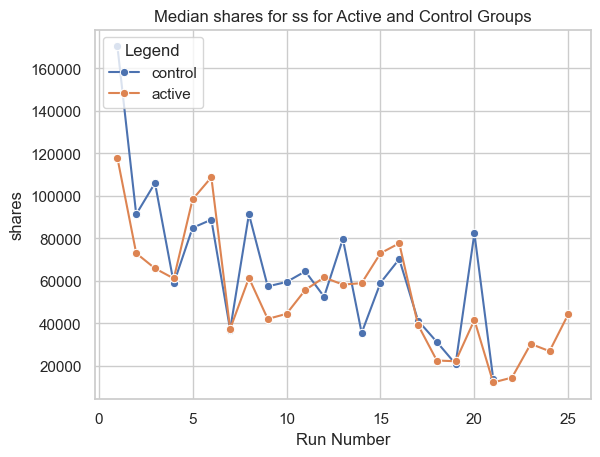

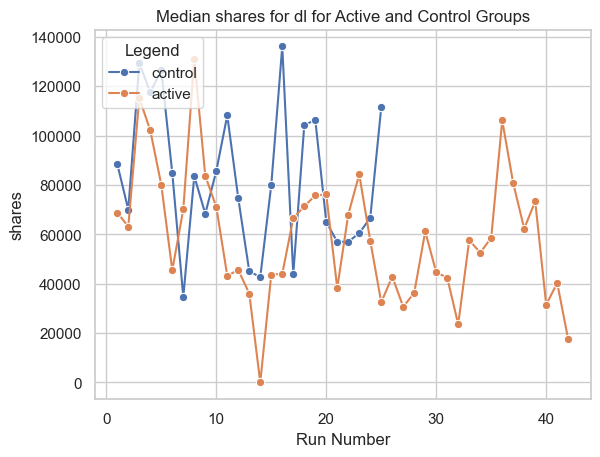

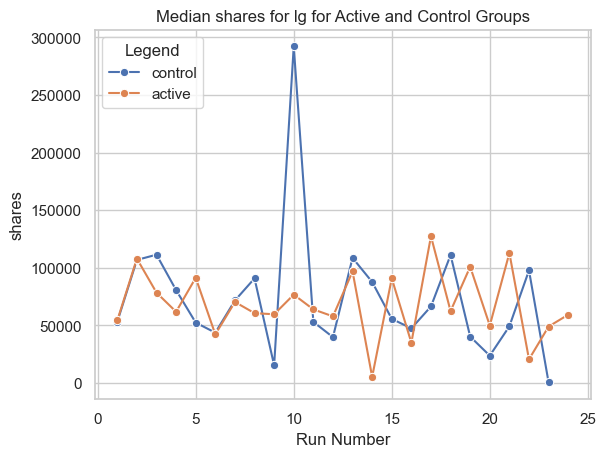

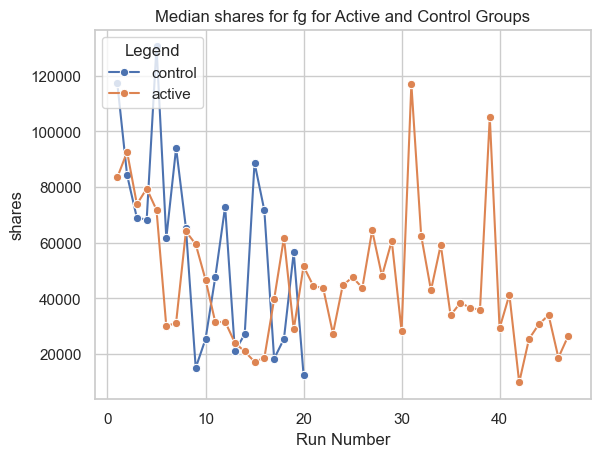

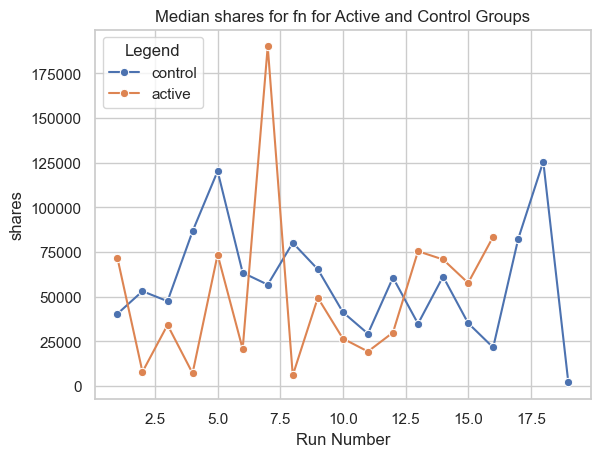

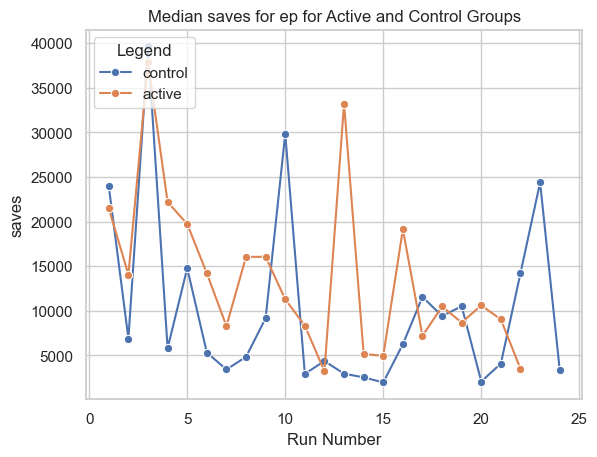

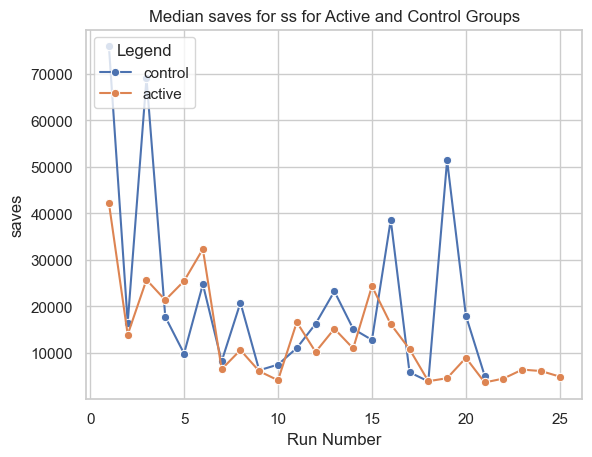

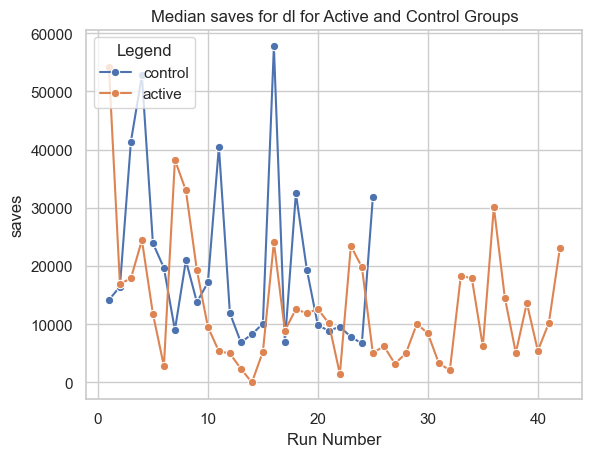

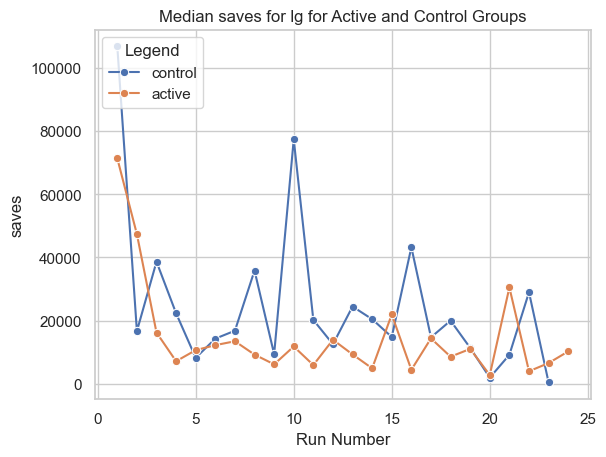

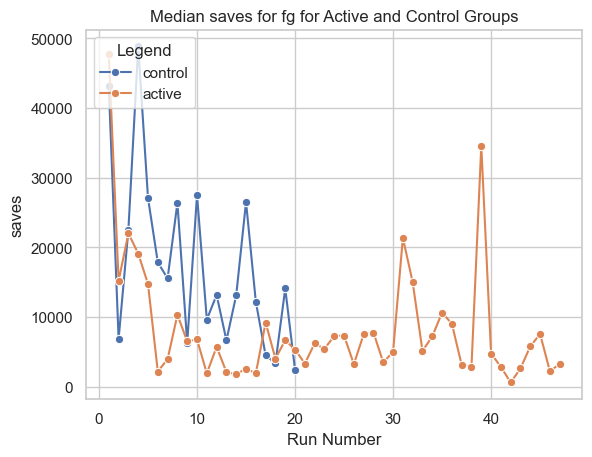

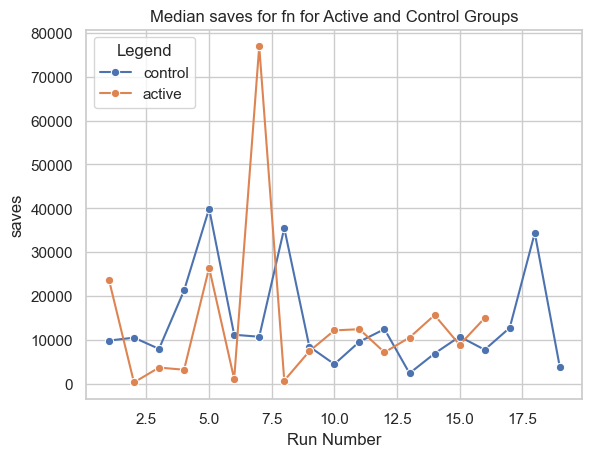

In [13]:
dfs = [ep, ss, dl, lg, fg, fn]
initials = ['ep', 'ss', 'dl', 'lg', 'fg', 'fn']
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for i in range(len(dfs)):
        plot_metric_member(metric, initials[i], dfs[i])

## **countAllHashtags**

Takes a string or a NaN value. Splits the strings to find hashtags, updates a Counter object (*a global variable*) to keep track of all hashtags.

##### The following code collects frequency for all hashtags.

In [16]:
cnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        cnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = df['hashtags'].apply(countAllHashtags)
all_hashtagfreq = cnt.most_common(25)
all_hashtagfreq

[("'fyp'", 1173),
 ("['fyp'", 987),
 ("'viral'", 768),
 ("'foryou'", 704),
 ("'fyp%E3%82%B7'", 453),
 ("'foryoupage'", 380),
 ("'fyp']", 367),
 ("'funny'", 294),
 ("'trending'", 272),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 226),
 ("'relatable'", 174),
 ("['foryou'", 174),
 ("'viralvideo'", 163),
 ("'viral']", 162),
 ("['fyp%E3%82%B7'", 161),
 ("'tiktok'", 158),
 ("['fyp']", 156),
 ("'couple'", 140),
 ("'foryou']", 137),
 ("'fy'", 123),
 ("'trend'", 117),
 ("'dance'", 99),
 ("'foryoupage']", 97),
 ("['viral'", 96),
 ("'blowthisup'", 94)]

##### The following code collects frequency for all hashtags shown in **control** accounts.

In [17]:
control = pd.concat([ep_cntrl,ss_cntrl,fg_cntrl,lg_cntrl,dl_cntrl])
controlCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        controlCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = control['hashtags'].apply(countAllHashtags)
control_hashtagfreq = controlCnt.most_common(25)
control_hashtagfreq

[("'fyp'", 317),
 ("['fyp'", 240),
 ("'viral'", 213),
 ("'foryou'", 183),
 ("'fyp%E3%82%B7'", 142),
 ("'foryoupage'", 125),
 ("'fyp']", 93),
 ("'funny'", 82),
 ("'trending'", 70),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 67),
 ("'viralvideo'", 60),
 ("['foryou'", 43),
 ("'tiktok'", 43),
 ("'fy'", 43),
 ("'viral']", 38),
 ("['fyp%E3%82%B7'", 38),
 ("'fypage'", 36),
 ("'foryou']", 33),
 ("'therian'", 31),
 ("'fyppppppppppppppppppppppp'", 31),
 ("'relatable'", 31),
 ("'couple'", 31),
 ("'therianthropy'", 28),
 ("['viral'", 28),
 ("['fyp']", 28)]

##### The following code collects frequency for all hashtags shown in **active** accounts.

In [18]:
active = pd.concat([ep_activ,ss_activ,fg_activ,lg_activ,dl_activ])
activeCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        activeCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = active['hashtags'].apply(countAllHashtags)
active_hashtagfreq = activeCnt.most_common(25)
active_hashtagfreq

[("'fyp'", 755),
 ("['fyp'", 665),
 ("'viral'", 509),
 ("'foryou'", 484),
 ("'fyp%E3%82%B7'", 289),
 ("'fyp']", 239),
 ("'foryoupage'", 236),
 ("'funny'", 193),
 ("'trending'", 184),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 142),
 ("'relatable'", 129),
 ("['foryou'", 120),
 ("['fyp']", 112),
 ("'tiktok'", 108),
 ("['fyp%E3%82%B7'", 107),
 ("'viral']", 107),
 ("'foryou']", 96),
 ("'viralvideo'", 94),
 ("'trend'", 91),
 ("'couple'", 91),
 ("'dance'", 73),
 ("'fy'", 71),
 ("'blowthisup'", 70),
 ("'foryoupage']", 67),
 ("'couplegoals'", 66)]

##### Cleaning the hashtag list and turning it into a dataframe.

In [19]:
delete = ['fyp', 'foryou', 'fy', 'fypage', 'foryoupage', 'viral','trending','tiktok']
def clean_hashtag(hashfreq):
    """
    Clean the hashtag list and turn it into a dataframe
    """
    hashtags = []
    freqs = []
    for hashtag, freq in hashfreq:
        #change the hashtag into readable format
        if '%' in hashtag:
            hashtag = urllib.parse.unquote(hashtag)
        #reformat the hashtags
        hashtag = hashtag.replace("'","")
        hashtag = hashtag.replace("[","")
        hashtag = hashtag.replace("]","")
        #check if we want the hashtag
        if (hashtag not in delete) and ('fyp' not in hashtag):
            hashtags.append(hashtag)
            freqs.append(freq)
    #generate dataframe
    df = pd.DataFrame()
    df["hashtag"] = hashtags
    df["freq"] = freqs
    return df

##### Creating a bargraph representation of frequency.

In [20]:
def get_hashfreq_bar(df, group):
  """
  Takes in a dataframe as an input and generate a bar graph 
  """
  plt.bar(df["hashtag"],df["freq"], color ='lightseagreen', width = 0.4)

  plt.xlabel("Hashtags")
  plt.ylabel("No. of times the hashtage appears")
  plt.title(f"Frequencies of Hashtag for {group} group")
  plt.xticks(rotation=45)

  plt.savefig(f'{cwd}/vizualizations/{group}_bargraph.png', bbox_inches='tight')
  plt.show()

##### Creating a piechart representation of frequency.

In [22]:
def get_hashfreq_pie(df, group):
    """
    Takes in a dataframe as an input and generate a pie chart 
    """
    df["percent"] = (df['freq']/df['freq'].sum())*100
    y = df["freq"]
    mylabels = df["hashtag"]

    plt.pie(y, labels = mylabels)
    plt.title(f"Frequencies of Hashtag for {group} group")

    plt.savefig(f'{cwd}/vizualizations/{group}_piechart.png', bbox_inches='tight')
    plt.show() 

##### Cleaning hashtags for **all**, **active**, and **control**.

In [23]:
df_all = clean_hashtag(all_hashtagfreq)
df_active = clean_hashtag(active_hashtagfreq)
df_control = clean_hashtag(control_hashtagfreq)

##### Creating a bargraph representation of frequency 

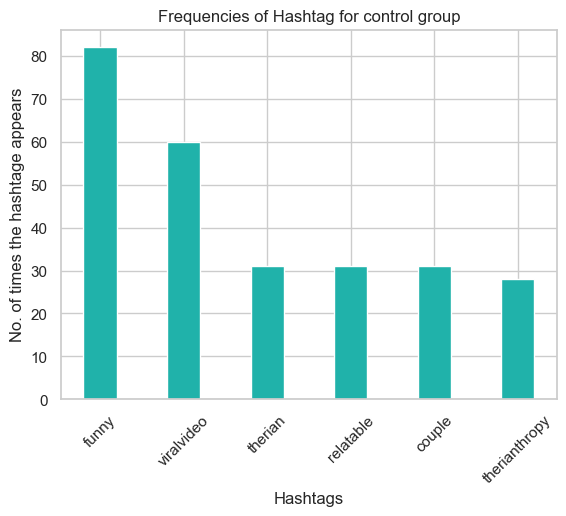

In [24]:
get_hashfreq_bar(df_control, 'control')

##### Creating a piechart representation of frequency of 

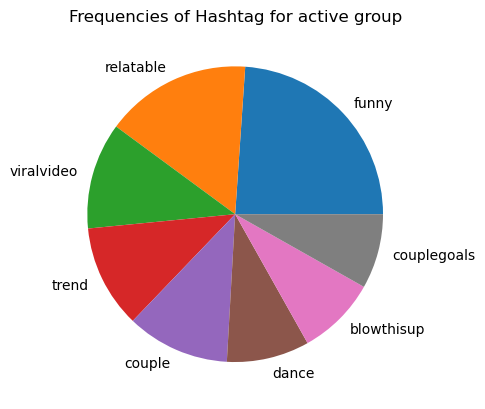

In [23]:
get_hashfreq_pie(df_active, 'active')

## **plot_differences**

Function to create differences and regression graph, plots the difference between the median control and median active metric.

##### **Parameters**:
- **initial**: *str*, the initials of one of section 1 group 2's members, either "ep", "ss", "Dl", "lg", "fg", or "fn"
- **columns_to_plot**: a *list* of the difference columns to plot in the graph:
  - Options are ['likes_log_dif',likes_dif','comments_dif','shares_dif','saves_dif']

In [27]:
def plot_differences(initial,metric_column,title,min_yaxis,max_yaxis):
    '''
    initial: the initials of one of section 1 group 2's members, either "ep", "ss", "Dl", "lg", "fg", or "fn"
    columns_to_plot: a list of the difference columns to plot in the graph:
        Options are ['likes_dif','comments_dif','shares_dif','saves_dif']
    Plots the difference between the median control and median active metric. 
    '''
    df_activ = df[df['batchID'].str.contains(f'{initial}_activ')]
    df_cntrl = df[df['batchID'].str.contains(f'{initial}_cntrl')]
    
    #get descriptive statistic for df by index
    metrics = ["likes", "comments", "shares", "saves"]
    df_activ_group = df_activ.groupby('run')[metrics].median()
    df_cntrl_group = df_cntrl.groupby('run')[metrics].median()

    # rename columns for clarity 
    activ_column_mapping = {'likes':'likes_activ','comments':'comments_activ',
                            'shares':'shares_activ','saves':'saves_activ'}
    cntrl_column_mapping = {'likes':'likes_cntrl','comments':'comments_cntrl',
                            'shares':'shares_cntrl','saves':'saves_cntrl'}
    df_activ_group.rename(columns=activ_column_mapping,inplace=True)
    df_cntrl_group.rename(columns=cntrl_column_mapping,inplace=True)

    # find the difference in means for all the metrics
    df_dif = pd.concat([df_activ_group,df_cntrl_group],axis=1)
    df_dif.dropna(inplace=True) # drop the rows with NA
    df_dif['likes_dif'] = df_dif["likes_cntrl"] - df_dif['likes_activ']
    df_dif['comments_dif'] = df_dif["comments_cntrl"] - df_dif['comments_activ']
    df_dif['shares_dif'] = df_dif["shares_cntrl"] - df_dif['shares_activ']
    df_dif['saves_dif'] = df_dif["saves_cntrl"] - df_dif['saves_activ']
    
    # Plot the differences
    plt.figure(figsize=(15, 6)) # (width,height)
    
    # Create the line plot
    plot_colors = ['lightblue','lightgreen','orange','red']
    sns.lineplot(x='run', y=metric_column,data=df_dif, 
                 linewidth = 2,color=plot_colors[0],label=f'{title} Difference')
    
    # Add the regression line
    reg_colors = ['blue','darkgreen','darkorange','darkred']
    sns.regplot(x=df_dif.index, y=metric_column,data=df_dif,ci=None,
                color=reg_colors[0],line_kws={'linewidth':3},label=f'{title} Regression')
        
    # Edit Graph
    plt.title(f'Difference in Median {title} by Run for {initial} Data')
    plt.axis([1,len(df_dif),min_yaxis,max_yaxis])
    plt.xlabel('Runs')
    plt.xticks(df_dif.index)
    plt.ylabel('Difference (control - active)')
    plt.legend()
    
#     plt.savefig(f'{cwd}/{initial}_{title}_differences.png', bbox_inches='tight')
    plt.show()

    return df_dif

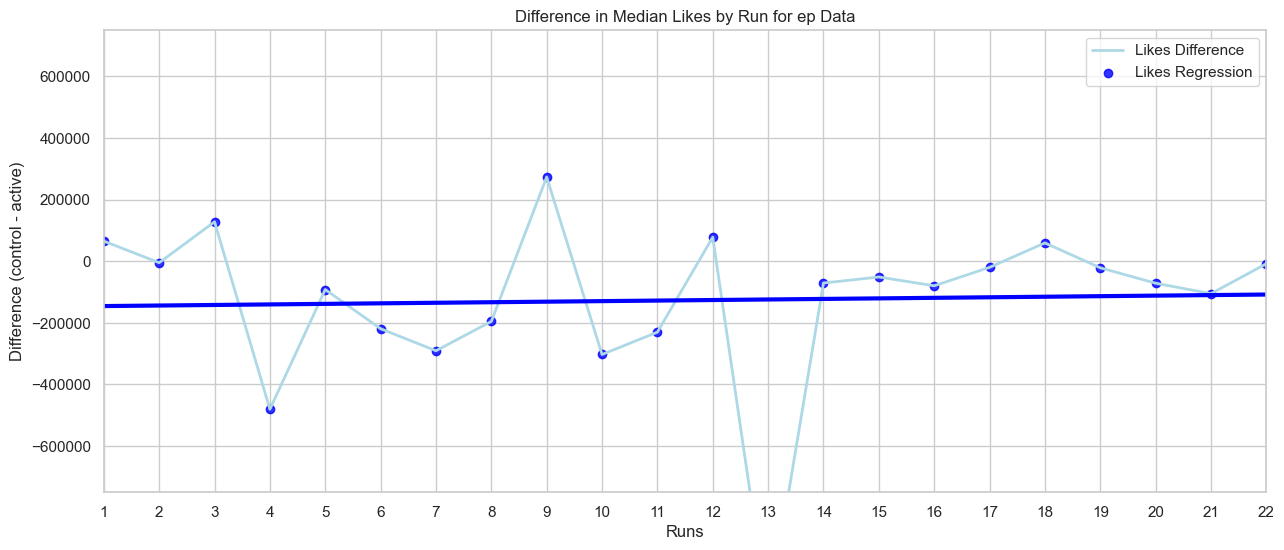

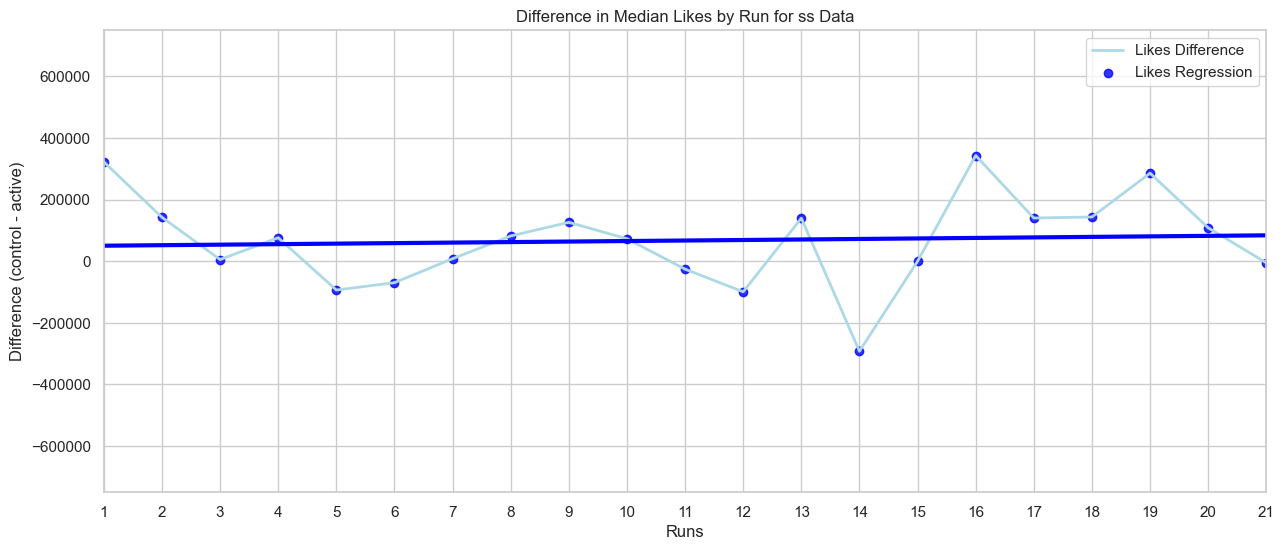

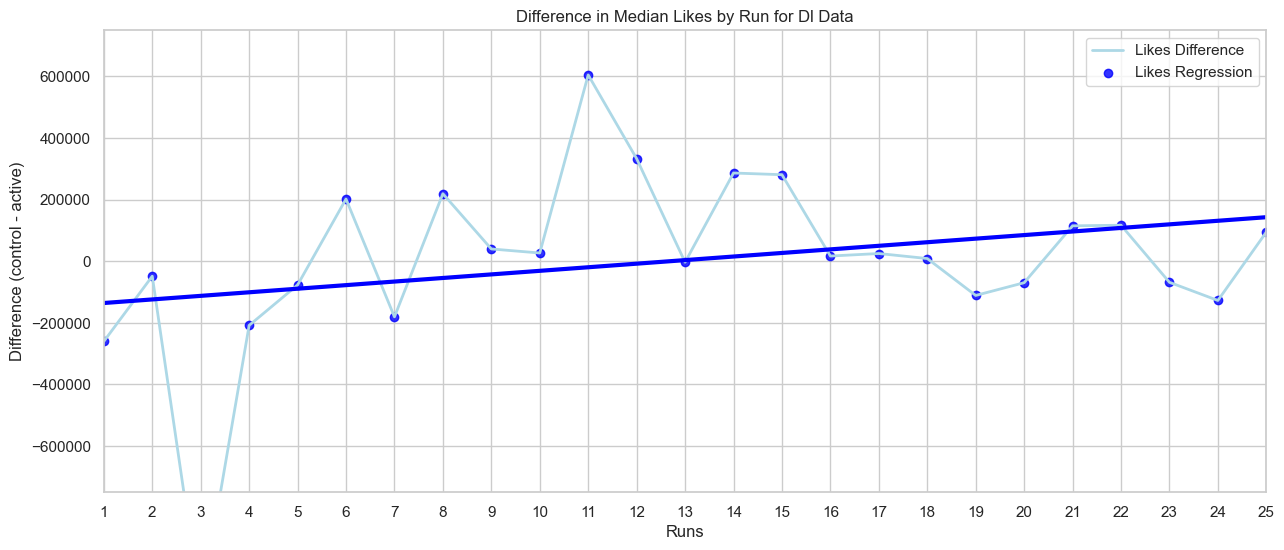

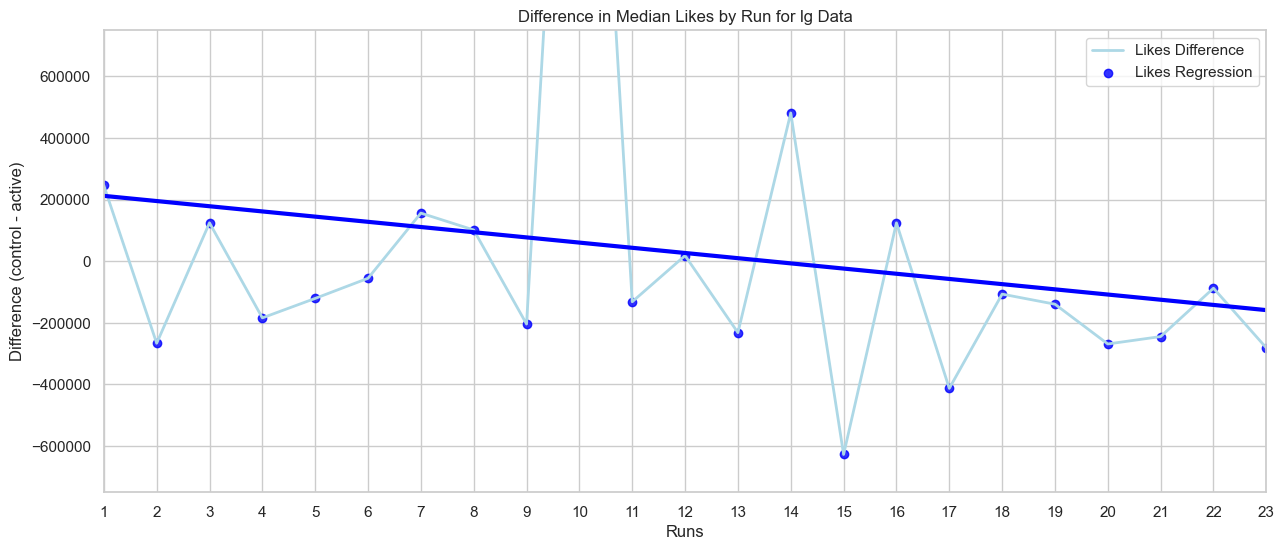

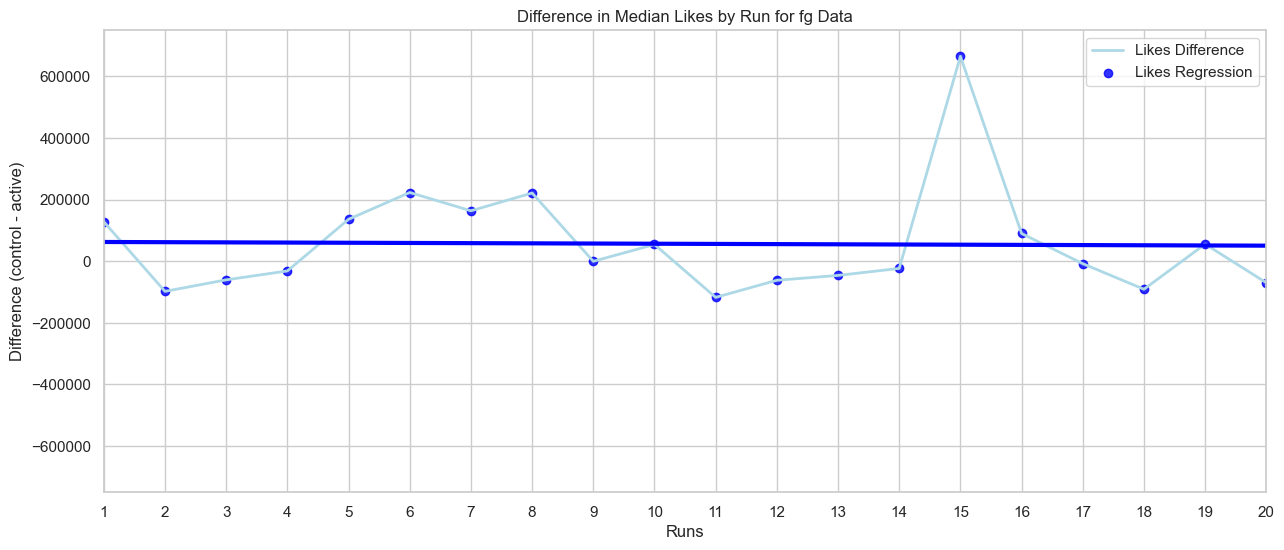

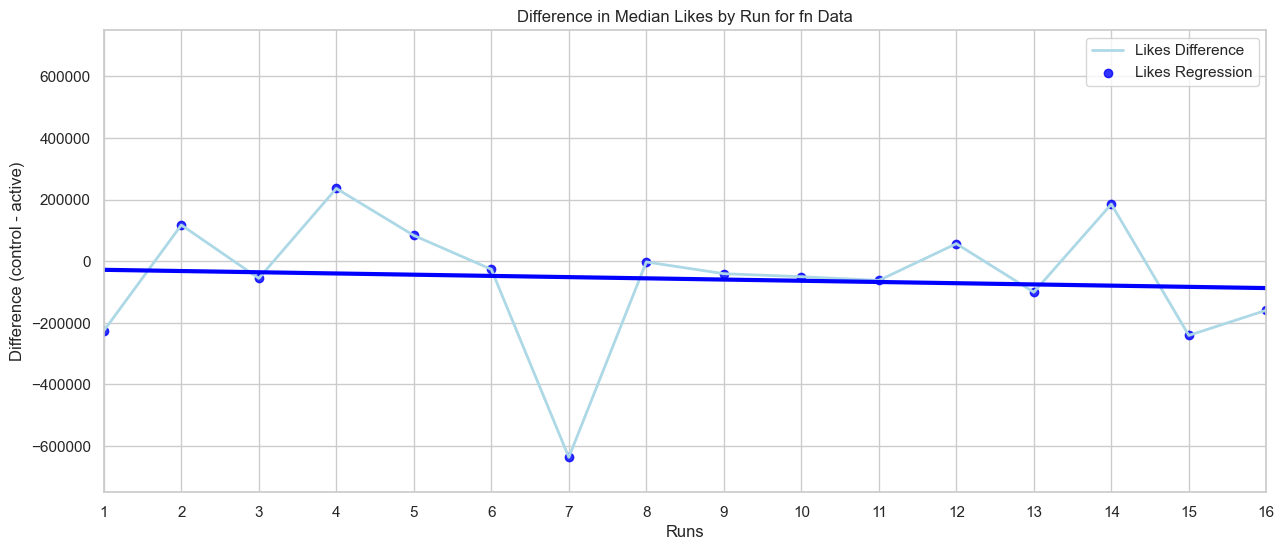

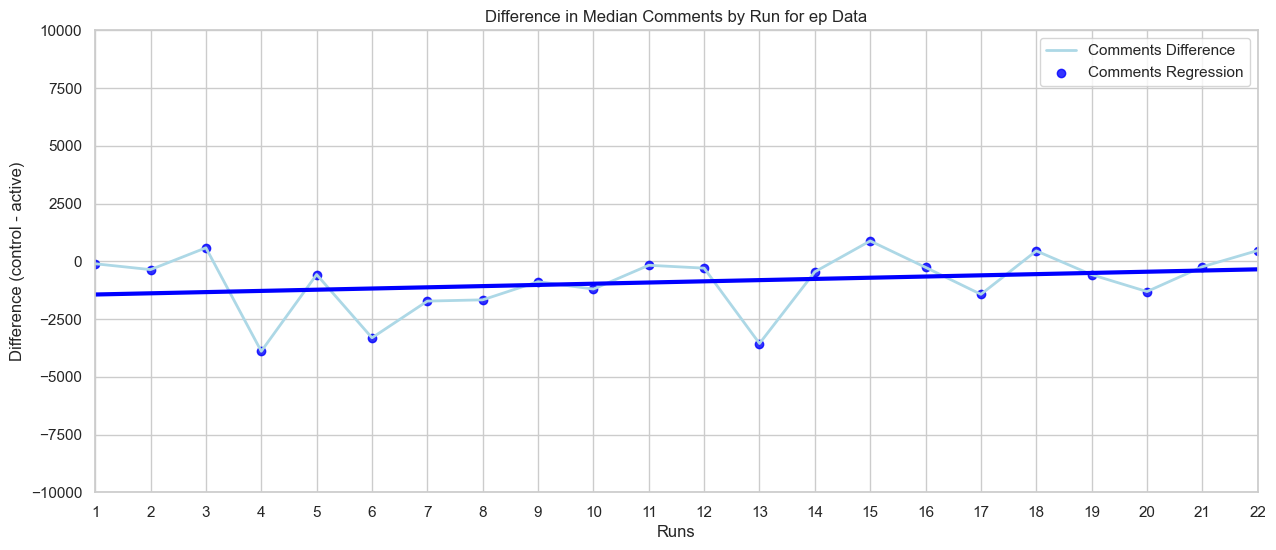

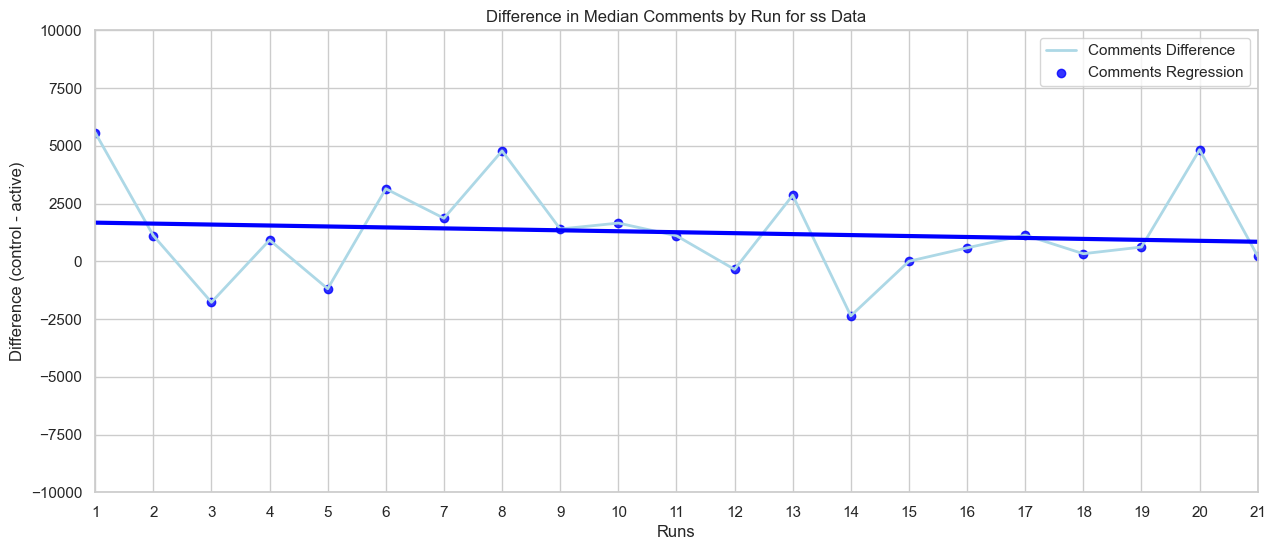

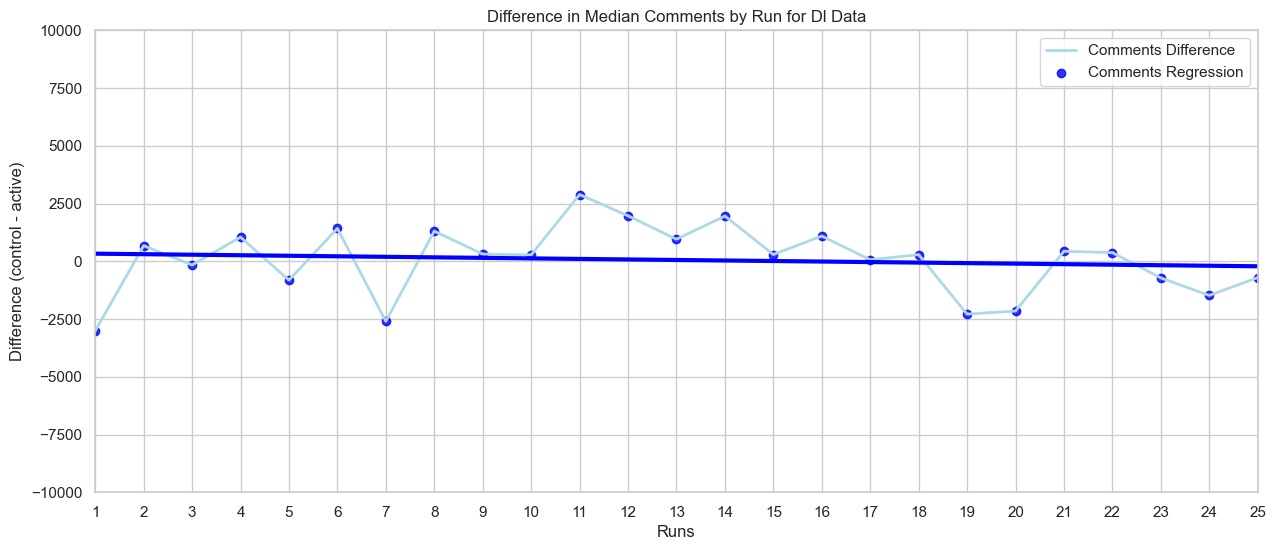

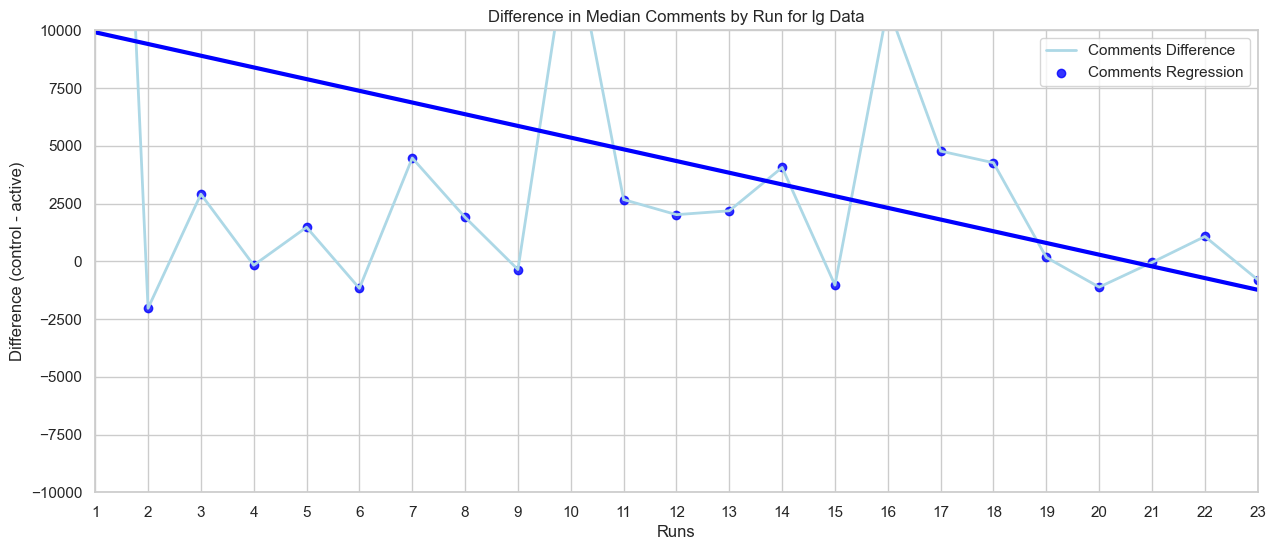

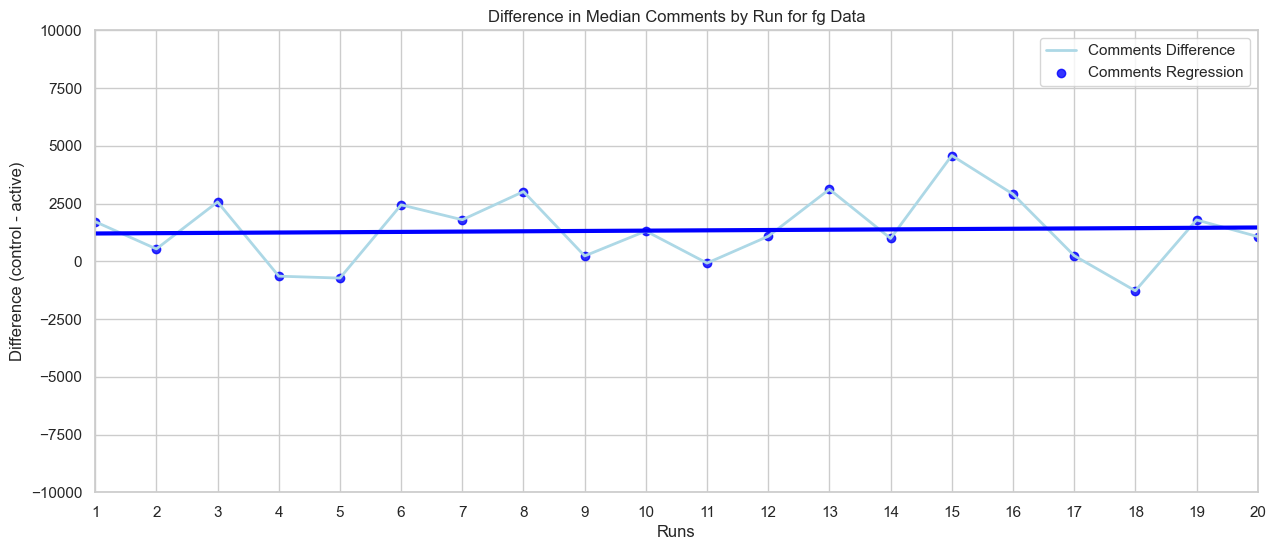

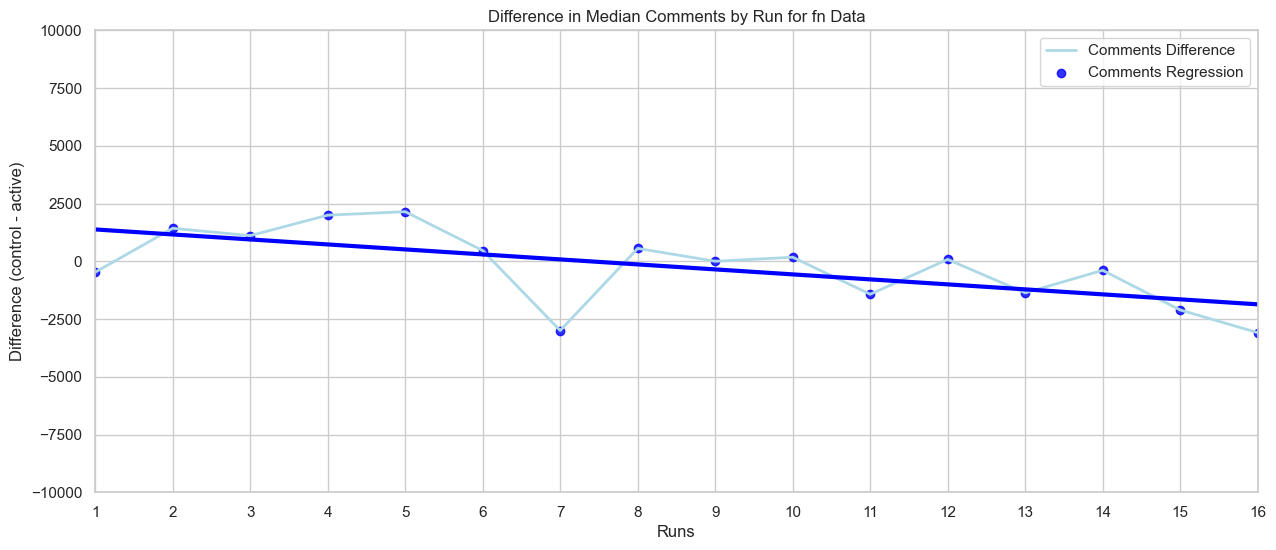

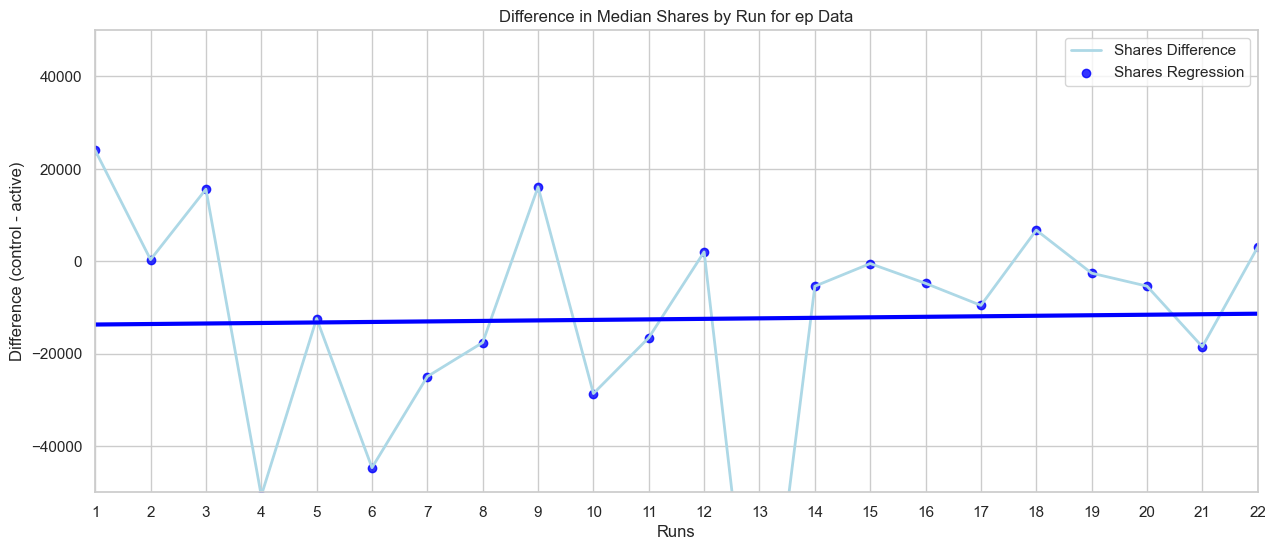

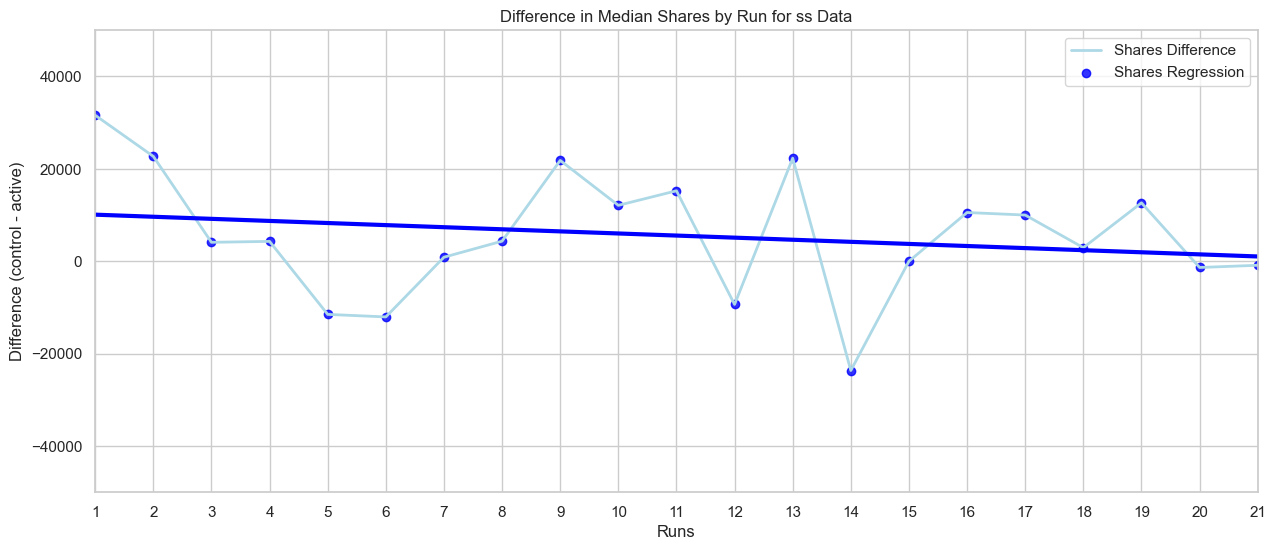

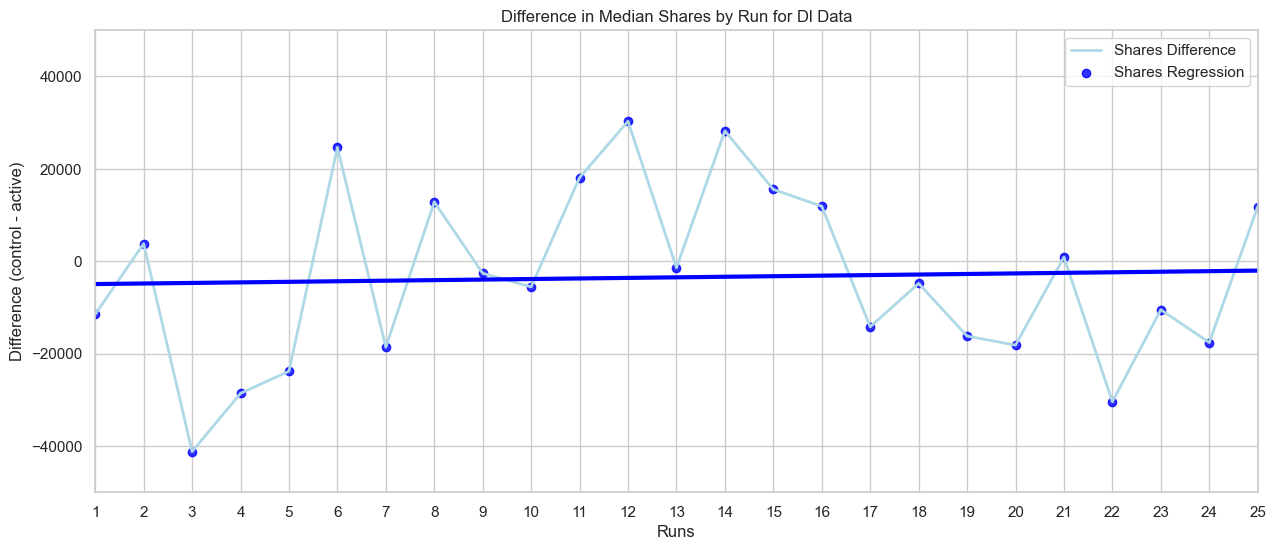

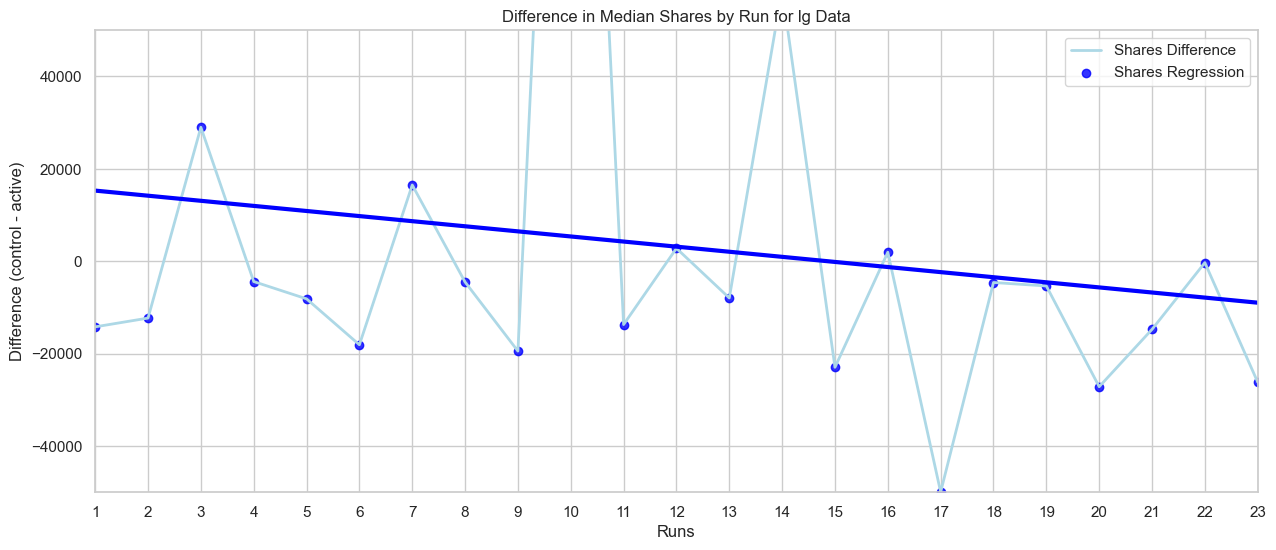

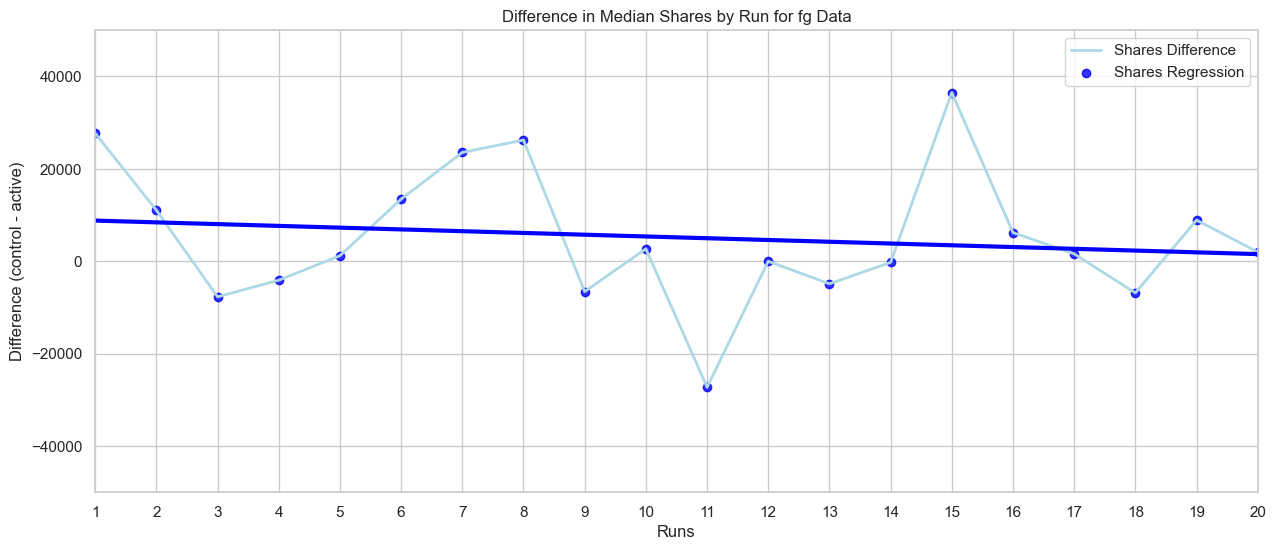

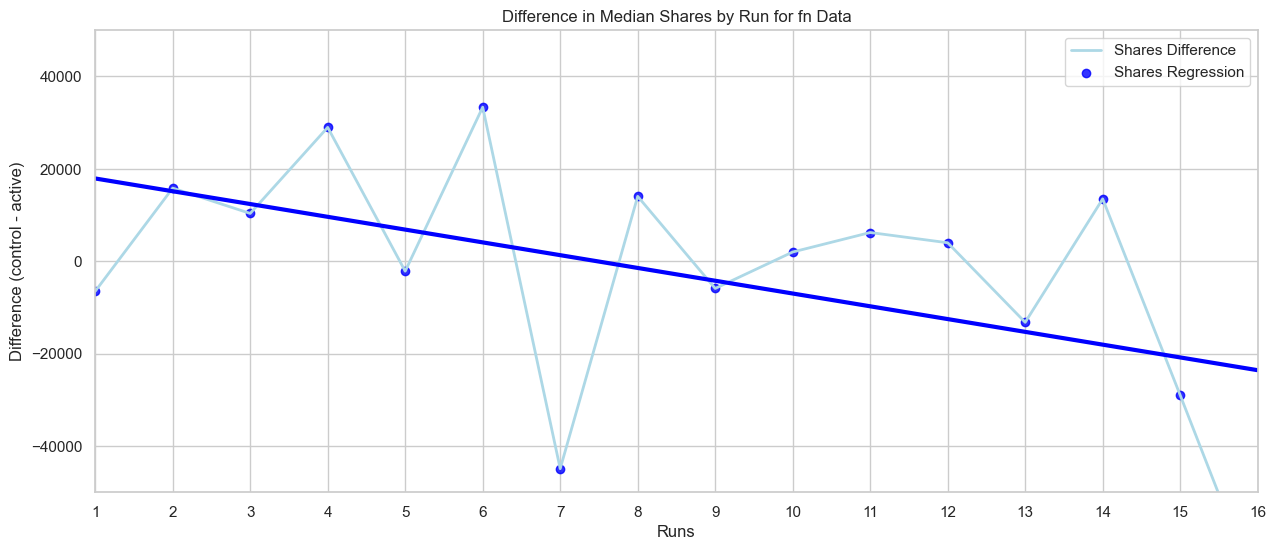

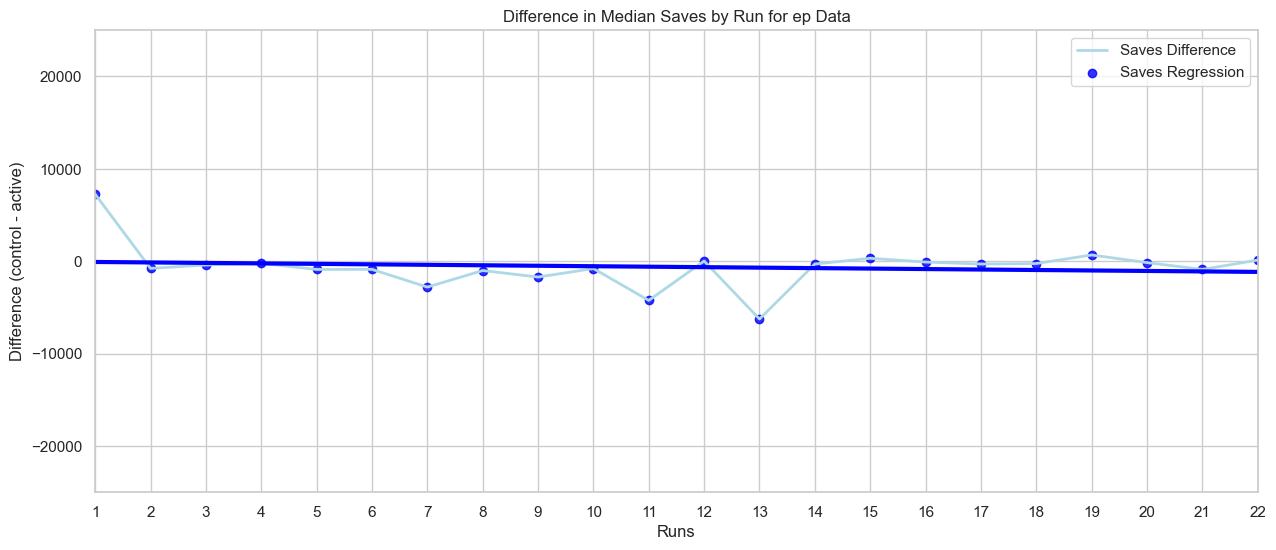

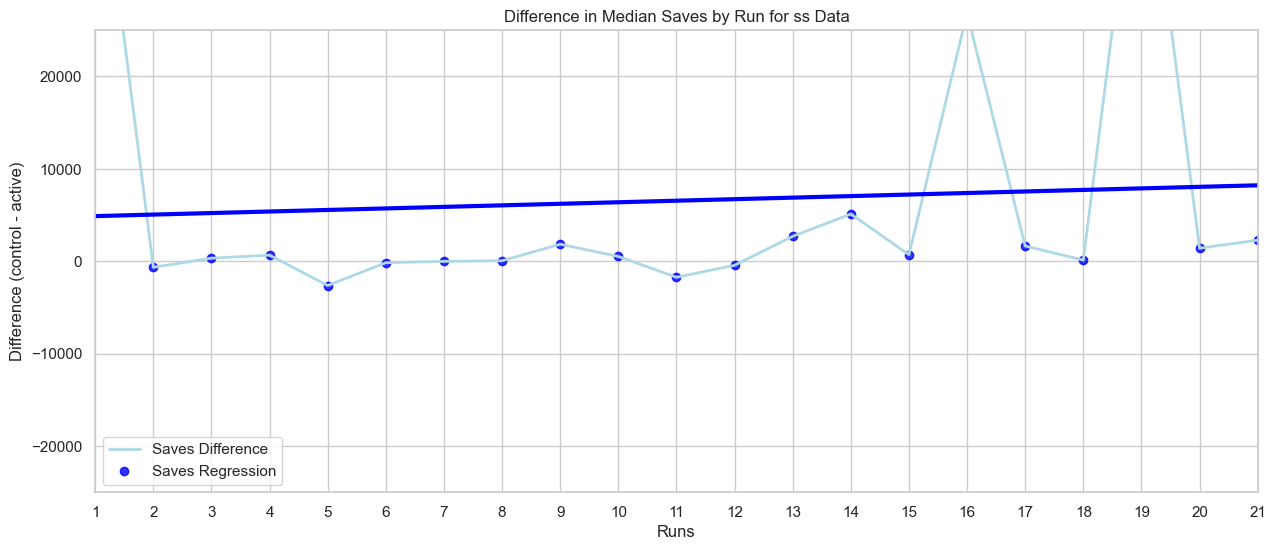

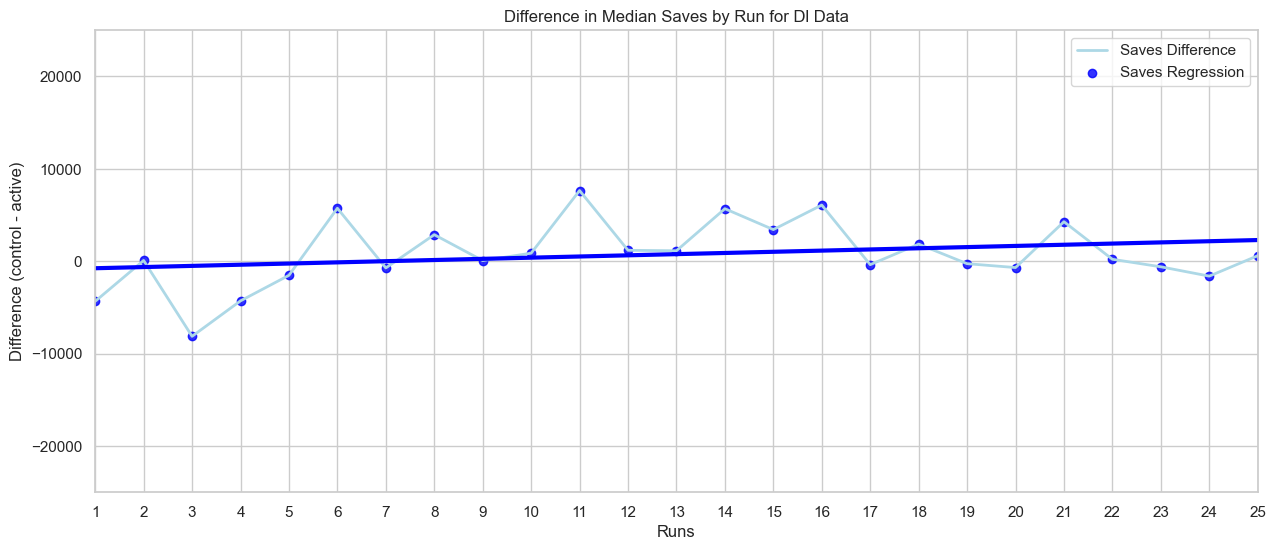

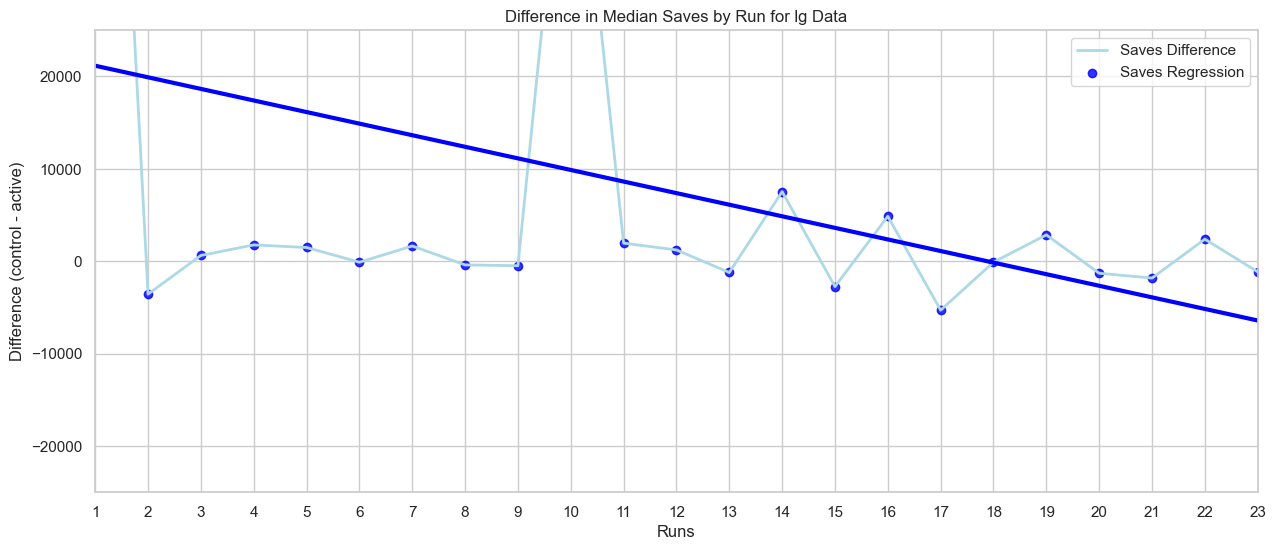

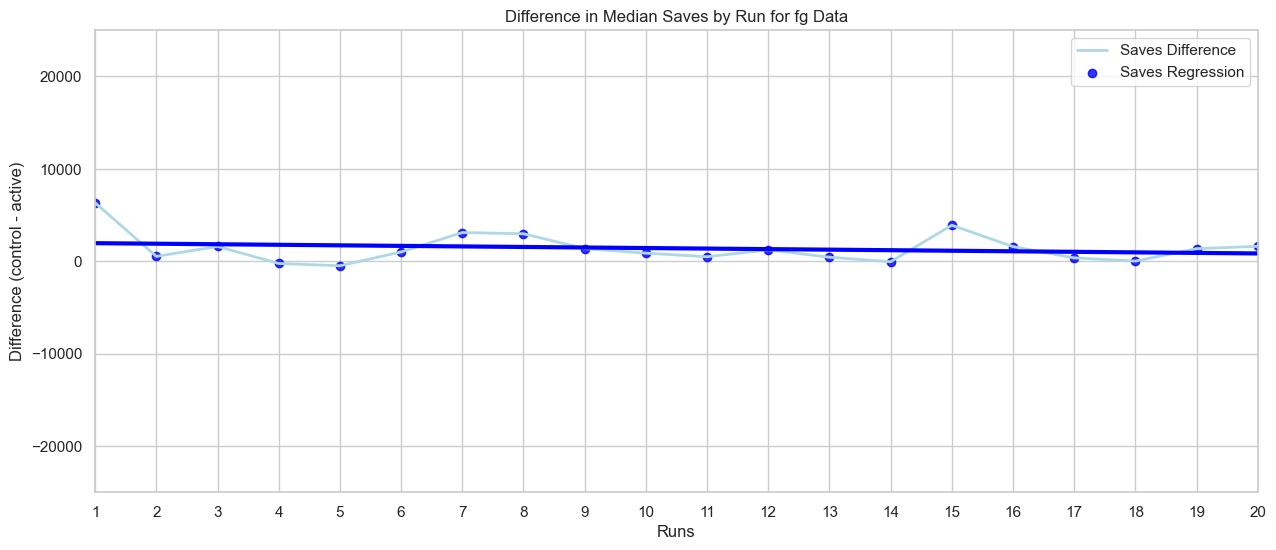

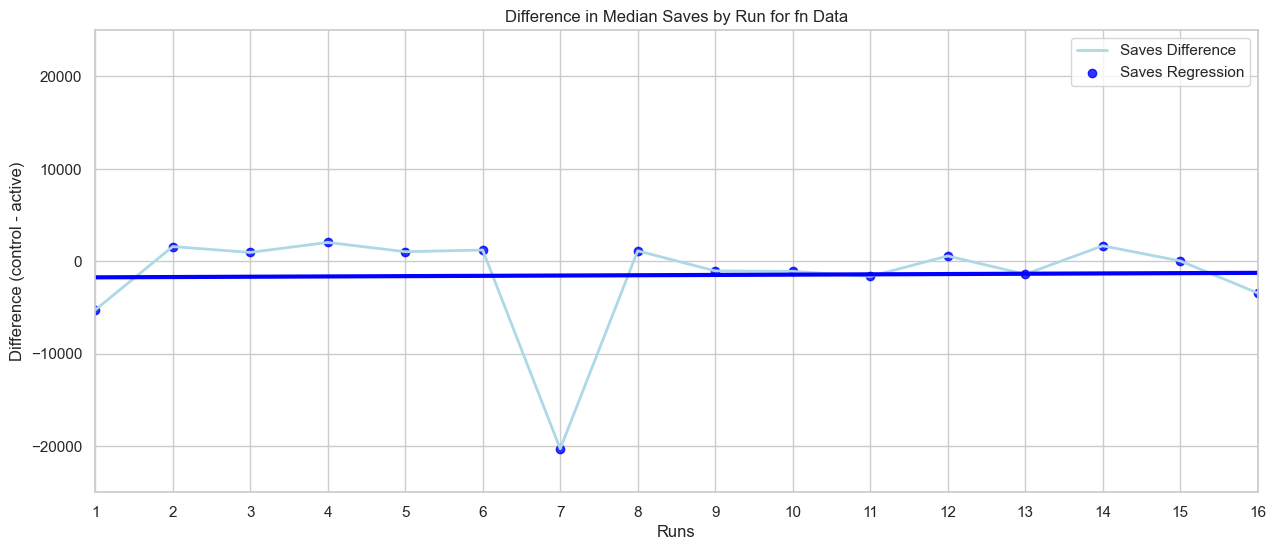

In [28]:
members = ["ep", "ss", "Dl", "lg", "fg", "fn"]
features = ['likes_dif','comments_dif','shares_dif','saves_dif']

for member in members:
    plot_differences(member,'likes_dif','Likes',-750000,750000)
    
for member in members:
    plot_differences(member,'comments_dif','Comments',-10000,10000)
    
for member in members:
    plot_differences(member,'shares_dif','Shares',-50000,50000) 
    
for member in members:
    plot_differences(member,'saves_dif','Saves',-25000,25000) 

## **jaccard_similarity**

Takes in two columns of the dataframe and calculates their similarities.

In [29]:
def createPostID(row):
    return f"{row['author']}_{row['saves']}"

df['postID'] = df.apply(createPostID, axis=1)
df.head()

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags,group,postID
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN,active,ina.katherine_94800
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...",active,leci.bby_164
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN,active,kassieemariee_6060
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',...",active,caseynicolaxx_62
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN,active,jailyneojeda_965


In [30]:
# For each team member, create a separate dataframe containing their active data
ep_activ = df[df['batchID'].str.contains('ep_activ')]
ss_activ = df[df['batchID'].str.contains('ss_activ')]
fg_activ = df[df['batchID'].str.contains('fg_activ')]
fn_activ = df[df['batchID'].str.contains('fn_activ')]
lg_activ = df[df['batchID'].str.contains('lg_activ')]
dl_activ = df[df['batchID'].str.contains('Dl_activ')]

# For each team member, create a separate dataframe containing their control data
ep_cntrl = df[df['batchID'].str.contains('ep_cntrl')]
ss_cntrl = df[df['batchID'].str.contains('ss_cntrl')]
fg_cntrl = df[df['batchID'].str.contains('fg_cntrl')]
fn_cntrl = df[df['batchID'].str.contains('fn_cntrl')]
lg_cntrl = df[df['batchID'].str.contains('lg_cntrl')]
dl_cntrl = df[df['batchID'].str.contains('Dl_cntrl')]

In [31]:
def jaccard_similarity(list1, list2):
    """
    Takes in two columns of the dataframe and calculates their similarities.
    """
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    
    return float(intersection) / union

##### Jaccard similarity of content creators. Running for each member.

In [32]:
# Dora
dl_cntrl_authors = dl_cntrl['author']
dl_exper_authors = dl_activ['author']
dl_author_jaccard = jaccard_similarity(dl_cntrl_authors, dl_exper_authors)

In [33]:
# Edith
ep_cntrl_authors = ep_cntrl['author']
ep_exper_authors = ep_activ['author']
ep_author_jaccard = jaccard_similarity(ep_cntrl_authors, ep_exper_authors)

In [34]:
# Fernanda
fg_cntrl_authors = fg_cntrl['author']
fg_exper_authors = fg_activ['author']
fg_author_jaccard = jaccard_similarity(fg_cntrl_authors, fg_exper_authors)

In [35]:
# Fridah
fn_cntrl_authors = fn_cntrl['author']
fn_exper_authors = fn_activ['author']
fn_author_jaccard = jaccard_similarity(fn_cntrl_authors, fn_exper_authors)

In [36]:
# Lucia
lg_cntrl_authors = fg_cntrl['author']
lg_exper_authors = fg_activ['author']
lg_author_jaccard = jaccard_similarity(lg_cntrl_authors, lg_exper_authors)

In [37]:
# Sazma
ss_cntrl_authors = ss_cntrl['author']
ss_exper_authors = ss_activ['author']
ss_author_jaccard = jaccard_similarity(ss_cntrl_authors, ss_exper_authors)

In [38]:
author_jaccard = [dl_author_jaccard, ep_author_jaccard, fg_author_jaccard, fn_author_jaccard, lg_author_jaccard, ss_author_jaccard]

##### Jaccard similarity of posts. Running for each member.

In [39]:
# Dora
dl_cntrl_posts = dl_cntrl['postID']
dl_exper_posts = dl_activ['postID']
dl_posts_jaccard = jaccard_similarity(dl_cntrl_posts, dl_exper_posts)

In [40]:
# Edith
ep_cntrl_posts = ep_cntrl['postID']
ep_exper_posts = ep_activ['postID']
ep_posts_jaccard = jaccard_similarity(ep_cntrl_posts, ep_exper_posts)

In [41]:
# Fernanda
fg_cntrl_posts = fg_cntrl['postID']
fg_exper_posts = fg_activ['postID']
fg_posts_jaccard = jaccard_similarity(fg_cntrl_posts, fg_exper_posts)

In [42]:
# Fridah
fn_cntrl_posts = fn_cntrl['postID']
fn_exper_posts = fn_activ['postID']
fn_posts_jaccard = jaccard_similarity(fn_cntrl_posts, fn_exper_posts)

In [43]:
# Lucia
lg_cntrl_posts = fg_cntrl['postID']
lg_exper_posts = fg_activ['postID']
lg_posts_jaccard = jaccard_similarity(lg_cntrl_posts, lg_exper_posts)

In [44]:
# Sazma
ss_cntrl_posts = ss_cntrl['postID']
ss_exper_posts = ss_activ['postID']
ss_posts_jaccard = jaccard_similarity(ss_cntrl_posts, ss_exper_posts)

In [45]:
posts_jaccard = [dl_posts_jaccard, ep_posts_jaccard, fg_posts_jaccard, fn_posts_jaccard, lg_posts_jaccard, ss_posts_jaccard]

##### Jaccard similarity of sounds. Running for each member.

In [46]:
# Dora
dl_cntrl_music = dl_cntrl['music']
dl_exper_music = dl_activ['postID']
dl_music_jaccard = jaccard_similarity(dl_cntrl_music, dl_exper_music)

In [47]:
# Edith
ep_cntrl_music = ep_cntrl['music']
ep_exper_music = ep_activ['music']
ep_music_jaccard = jaccard_similarity(ep_cntrl_music, ep_exper_music)

In [48]:
# Fernanda
fg_cntrl_music = fg_cntrl['music']
fg_exper_music = fg_activ['music']
fg_music_jaccard = jaccard_similarity(fg_cntrl_music, fg_exper_music)

In [49]:
# Fridah
fn_cntrl_music = fn_cntrl['music']
fn_exper_music = fn_activ['music']
fn_music_jaccard = jaccard_similarity(fn_cntrl_music, fn_exper_music)

In [50]:
# Lucia
lg_cntrl_music = fg_cntrl['music']
lg_exper_music = fg_activ['music']
lg_music_jaccard = jaccard_similarity(lg_cntrl_music, lg_exper_music)

In [51]:
# Sazma
ss_cntrl_music = ss_cntrl['music']
ss_exper_music = ss_activ['music']
ss_music_jaccard = jaccard_similarity(ss_cntrl_music, ss_exper_music)

In [52]:
music_jaccard = [dl_music_jaccard, ep_music_jaccard, fg_music_jaccard, fn_music_jaccard, lg_music_jaccard, ss_music_jaccard]

##### Dataframe to display all the jaccard indices.

In [53]:
initials = ['dl', 'ep', 'fg', 'fn', 'lg', 'ss']

combined_indices = pd.DataFrame(columns = ['content creators', 'posts', 'music'], index = initials)
combined_indices['content creators'] = author_jaccard
combined_indices['posts'] = posts_jaccard
combined_indices['music'] = music_jaccard

combined_indices

,content creators,posts,music
dl,0.209742,0.047619,0.000000
ep,0.159151,0.096739,0.160000
fg,0.143145,0.079511,0.143451
fn,0.093069,0.044118,0.090909
lg,0.143145,0.079511,0.143451
ss,0.297760,0.257709,0.303523


## **get_top_5**

Finds the top five creators that each member had on both active and control accounts.

In [ ]:
def get_top_5(auth_list):
    # Creates a dictionary that stores how many times a given content creator appears in the data
    auth_dict = {}
    for author in auth_list:
        if author in auth_dict:
            auth_dict[author] += 1
        else:
            auth_dict[author] = 1
            
    
    # Sorts in decreasing order to get the most popular ones
    sorted_authors = sorted(auth_dict.items(), key = lambda item: item[1], reverse = True)
    
    # Top 5 creators
    authors = []
    counts = []
    for author, count in sorted_authors[:5]:
        authors.append(author)
        counts.append(count)
    
    return authors, counts

##### Running **get_top_5** with each members data.

In [ ]:
# Control popular content creators
dl_cntrl_5_authors, dl_cntrl_5_count = get_top_5(dl_cntrl_authors)
ep_cntrl_5_authors, ep_cntrl_5_count = get_top_5(ep_cntrl_authors)
fg_cntrl_5_authors, fg_cntrl_5_count = get_top_5(fg_cntrl_authors)
fn_cntrl_5_authors, fn_cntrl_5_count = get_top_5(fn_cntrl_authors)
lg_cntrl_5_authors, lg_cntrl_5_count = get_top_5(lg_cntrl_authors)
ss_cntrl_5_authors, ss_cntrl_5_count = get_top_5(ss_cntrl_authors)

In [ ]:
# Experiment popular content creators
dl_exper_5_authors, dl_exper_5_count = get_top_5(dl_exper_authors)
ep_exper_5_authors, ep_exper_5_count = get_top_5(ep_exper_authors)
fg_exper_5_authors, fg_exper_5_count = get_top_5(fg_exper_authors)
fn_exper_5_authors, fn_exper_5_count = get_top_5(fn_exper_authors)
lg_exper_5_authors, lg_exper_5_count = get_top_5(lg_exper_authors)
ss_exper_5_authors, ss_exper_5_count = get_top_5(ss_exper_authors)

##### Starting vizualization for each member based on data above.

In [ ]:
# Dora
top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(dl_exper_5_count, labels = dl_exper_5_authors)
plt.title("Top 5 content creators in Dora's active bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/dora_top5_activ.png', bbox_inches='tight')
plt.show()

top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(dl_cntrl_5_count, labels = dl_cntrl_5_authors)
plt.title("Top 5 content creators in Dora's control bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/dora_top5_cntrl.png', bbox_inches='tight')
plt.show()

In [ ]:
# Edith
top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(ep_exper_5_count, labels = ep_exper_5_authors)
plt.title("Top 5 content creators in Edith's active bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/edith_top5_activ.png', bbox_inches='tight')
plt.show()

top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(ep_cntrl_5_count, labels = ep_cntrl_5_authors)
plt.title("Top 5 content creators in Edith's control bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/edith_top5_cntrl.png', bbox_inches='tight')
plt.show()

In [ ]:
# Fernanda
top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(fg_exper_5_count, labels = fg_exper_5_authors)
plt.title("Top 5 content creators in Fernanda's active bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/fernanda_top5_activ.png', bbox_inches='tight')
plt.show()

top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(fg_cntrl_5_count, labels = fg_cntrl_5_authors)
plt.title("Top 5 content creators in Fernanda's control bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/fernanda_top5_cntrl.png', bbox_inches='tight')
plt.show()

In [ ]:
# Fridah
top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(fn_exper_5_count, labels = fn_exper_5_authors)
plt.title("Top 5 content creators in Fridah's active bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/fridah_top5_activ.png', bbox_inches='tight')
plt.show()

top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(fn_cntrl_5_count, labels = fn_cntrl_5_authors)
plt.title("Top 5 content creators in Fridah's control bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/fridah_top5_cntrl.png', bbox_inches='tight')
plt.show()

In [ ]:
# Lucia
top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(lg_exper_5_count, labels = lg_exper_5_authors)
plt.title("Top 5 content creators in Lucia's active bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/lucia_top5_activ.png', bbox_inches='tight')
plt.show()

top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(lg_cntrl_5_count, labels = lg_cntrl_5_authors)
plt.title("Top 5 content creators in Lucia's control bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/lucia_top5_cntrl.png', bbox_inches='tight')
plt.show()

In [ ]:
# Sazma
top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(ss_exper_5_count, labels = ss_exper_5_authors)
plt.title("Top 5 content creators in Sazma's active bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/sazma_top5_activ.png', bbox_inches='tight')
plt.show()

top_5_fig = plt.figure(figsize=(8, 5))
plt.pie(ss_cntrl_5_count, labels = ss_cntrl_5_authors)
plt.title("Top 5 content creators in Sazma's control bot")

plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/sazma_top5_cntrl.png', bbox_inches='tight')
plt.show()